In [2]:
import pandas as pd
data = pd.read_csv('Flight_Data.csv')

In [4]:
data.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


### Basic checks

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

In [9]:
data.describe()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.997429e+06,498.909333,11.435000,3.963000,6.381000,0.524023,26.793383,2.317439,0.515885,0.690667
std,2.868139e+06,98.892266,6.899298,2.016346,3.473979,0.290694,27.874733,1.430386,0.295634,0.462296
min,3.681000e+03,138.000000,0.000000,1.000000,1.000000,0.000965,0.000000,0.000103,0.001039,0.000000
25%,2.520313e+06,431.000000,6.000000,2.000000,3.000000,0.278011,7.000000,1.092902,0.265793,0.000000
50%,5.073096e+06,497.000000,12.000000,4.000000,6.000000,0.522180,18.000000,2.126614,0.517175,1.000000
75%,7.462026e+06,566.000000,17.000000,6.000000,9.000000,0.776323,38.000000,3.525746,0.770370,1.000000
max,9.999011e+06,864.000000,23.000000,7.000000,12.000000,1.099246,259.000000,5.189038,1.123559,1.000000


In [11]:
data.describe(include='O')

,Airline,Origin_Airport,Destination_Airport,Airplane_Type
count,3000,3000,3000,3000
unique,5,5,4,5
top,Airline A,Airport 1,Airport 2,Type A
freq,1147,1059,1651,1132


### Basic checking

In [14]:
data.isnull().sum()

Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64

### Visual outliner detection

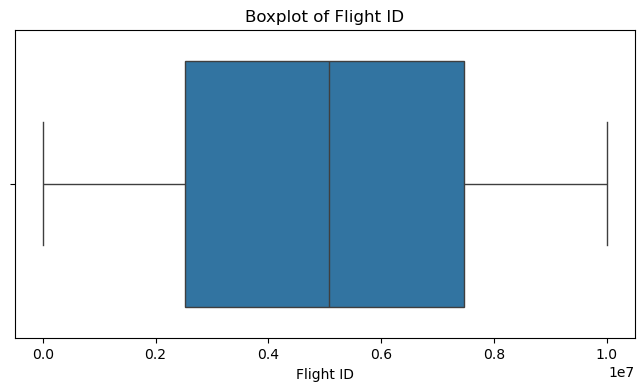

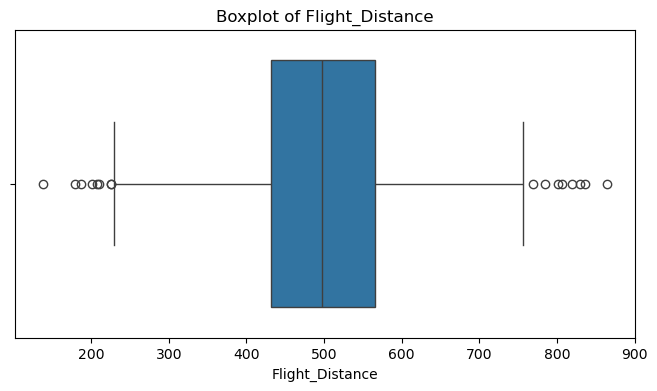

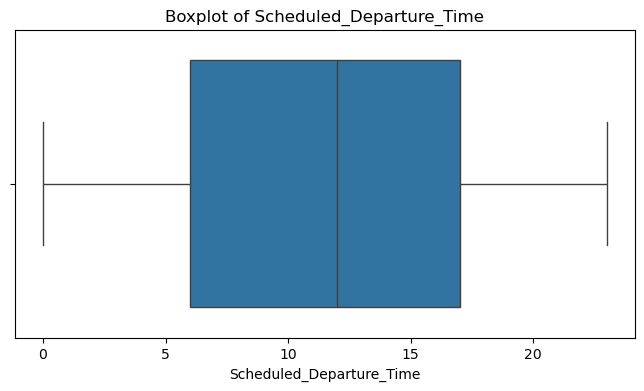

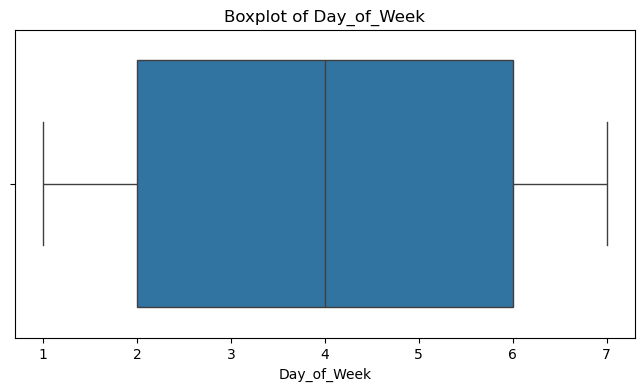

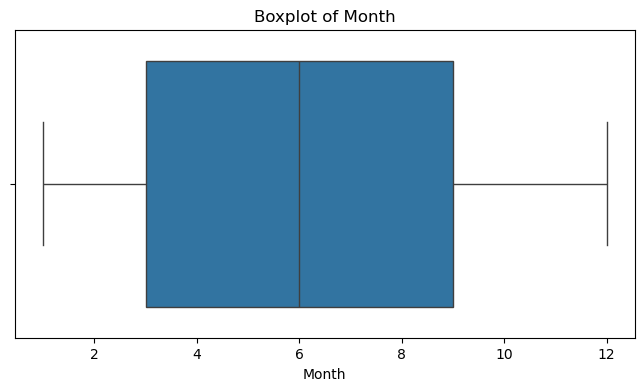

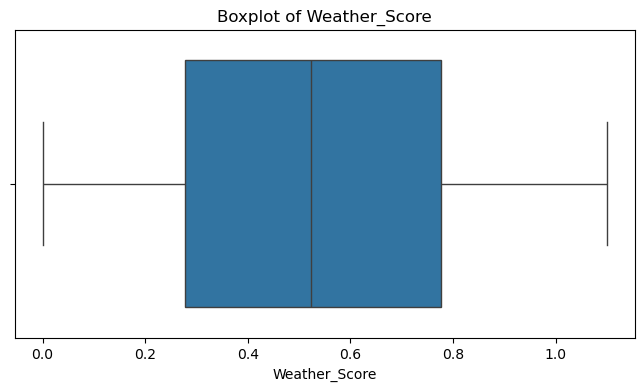

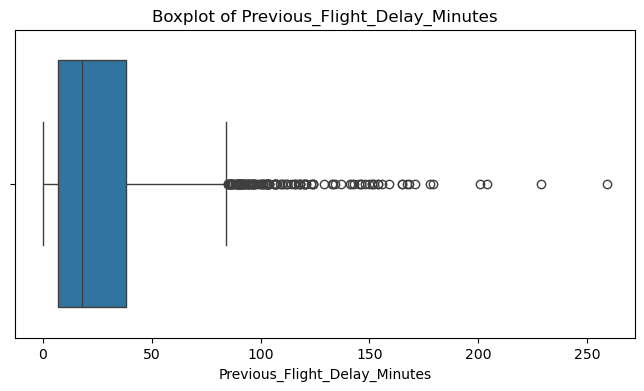

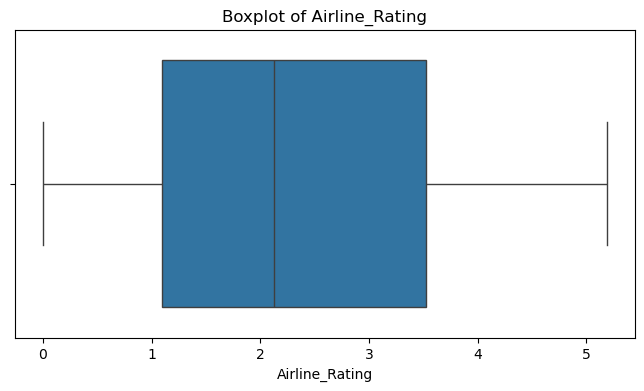

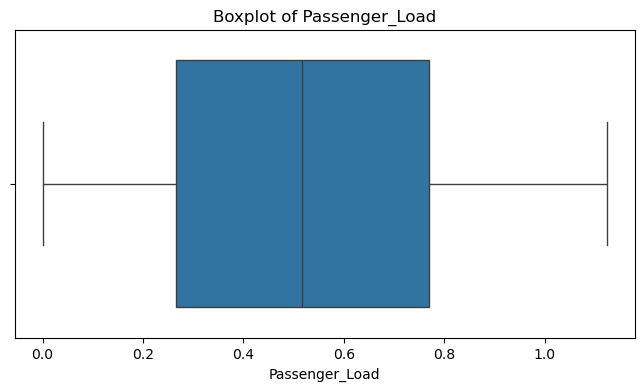

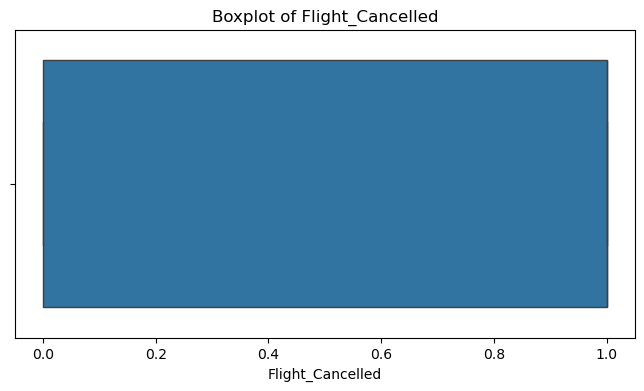

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Statistical Check Using Z-score

In [23]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(data[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)
print("Number of outlier rows:", outliers.sum())

Number of outlier rows: 61


### Feature Engineering

In [32]:
data['Dep_Hour'] = data['Scheduled_Departure_Time'] // 100
data['Dep_Minute'] = data['Scheduled_Departure_Time'] % 100

In [34]:
cat_cols = ['Airline', 'Origin_Airport', 'Destination_Airport', 'Airplane_Type']
for col in cat_cols:
    data[col] = data[col].astype('category')

In [36]:
data['Flight_Cancelled'] = data['Flight_Cancelled'].astype(bool)

In [38]:
data.to_csv('cleaned_flight_data.csv', index=False)